In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=12, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [7]:
print(np.max(x_train),np.min(x_train))
print(np.max(x_train_scaled),np.min(x_train_scaled))

255 0
2.0231433 -0.8105136


In [8]:
# tf.keras.models.Sequential()

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布， x = [x1, x2, x3]
#           y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y -> index. y->one_hot->[]
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

In [9]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))
# history = model.fit(x_train_all, y_train_all, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.7243 - accuracy: 0.5572 - val_loss: 1.1723 - val_accuracy: 0.7050
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9512 - accuracy: 0.7237 - val_loss: 0.7818 - val_accuracy: 0.7528
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7195 - accuracy: 0.7541 - val_loss: 0.6496 - val_accuracy: 0.7712
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6275 - accuracy: 0.7775 - val_loss: 0.5796 - val_accuracy: 0.7978
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5735 - accuracy: 0.7973 - val_loss: 0.5372 - val_accuracy: 0.8136
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5358 - accuracy: 0.8117 - val_loss: 0.5028 - val_accuracy: 0.8286
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5079 - accuracy: 0.8221 - val_loss: 0.4815 - val_accuracy:

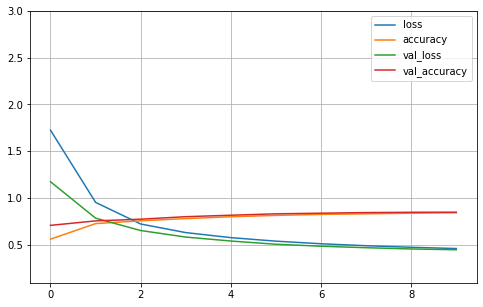

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0.09, 3)
    plt.show()

plot_learning_curves(history)

In [11]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.8269


[0.48157402873039246, 0.8269000053405762]